<a href="https://colab.research.google.com/github/ajinkyajumde/CNN-/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import cv2
import os


In [3]:
image=image.load_img('/content/drive/MyDrive/Almabetter projects/cnn/cnn1/training/modi/th.jpg')

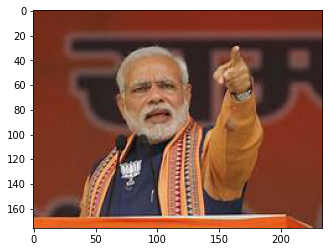

In [4]:
plt.imshow(image)

In [5]:
cv2.imread('/content/drive/MyDrive/Almabetter projects/cnn/cnn1/training/modi/th.jpg')

array([[[ 26,  42, 118],
        [ 26,  42, 118],
        [ 26,  42, 118],
        ...,
        [ 26,  43, 130],
        [ 22,  39, 126],
        [ 22,  39, 126]],

       [[ 26,  42, 118],
        [ 26,  42, 118],
        [ 26,  42, 118],
        ...,
        [ 26,  43, 130],
        [ 24,  41, 128],
        [ 24,  41, 128]],

       [[ 26,  42, 118],
        [ 26,  42, 118],
        [ 26,  42, 118],
        ...,
        [ 25,  42, 128],
        [ 25,  42, 128],
        [ 25,  42, 128]],

       ...,

       [[ 38,  99, 239],
        [ 37,  99, 237],
        [ 35,  97, 237],
        ...,
        [ 87,  91, 120],
        [ 80,  83, 111],
        [ 82,  83, 109]],

       [[ 46, 101, 236],
        [ 46, 102, 235],
        [ 44, 100, 235],
        ...,
        [ 81,  85, 114],
        [ 82,  85, 113],
        [ 84,  85, 111]],

       [[ 48, 100, 231],
        [ 48, 100, 231],
        [ 46, 100, 231],
        ...,
        [ 86,  90, 119],
        [ 83,  86, 114],
        [ 85,  86, 112]]

In [6]:
cv2.imread('/content/drive/MyDrive/Almabetter projects/cnn/cnn1/training/modi/th.jpg').shape

(176, 234, 3)

In [7]:
train=ImageDataGenerator(rescale=1/225)
validation=ImageDataGenerator(rescale=1/225)

In [8]:
train_df=train.flow_from_directory('/content/drive/MyDrive/Almabetter projects/cnn/cnn1/training',
                                   target_size=(200,200),
                                   batch_size=5,
                                   class_mode='binary')

Found 80 images belonging to 2 classes.


In [9]:
validation_df=train.flow_from_directory('/content/drive/MyDrive/Almabetter projects/cnn/cnn1/testing',
                                   target_size=(200,200),
                                   batch_size=5,
                                   class_mode='binary')

Found 14 images belonging to 2 classes.


In [10]:
train_df.class_indices

{'modi': 0, 'trump': 1}

In [11]:
train_df.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [12]:
validation_df.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [13]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')                                  
                                  ])

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [15]:
model.fit(train_df, epochs=10, validation_data=validation_df)

Epoch 1/10
16/16 [==============================] - 29s 2s/step - loss: 1.2039 - accuracy: 0.5625 - val_loss: 0.7015 - val_accuracy: 0.4286
Epoch 2/10
16/16 [==============================] - 11s 671ms/step - loss: 0.5631 - accuracy: 0.8000 - val_loss: 0.5786 - val_accuracy: 0.7857
Epoch 3/10
16/16 [==============================] - 11s 685ms/step - loss: 0.2956 - accuracy: 0.8375 - val_loss: 2.0191 - val_accuracy: 0.4286
Epoch 4/10
16/16 [==============================] - 11s 656ms/step - loss: 0.4004 - accuracy: 0.8625 - val_loss: 0.7429 - val_accuracy: 0.6429
Epoch 5/10
16/16 [==============================] - 11s 650ms/step - loss: 0.0650 - accuracy: 0.9875 - val_loss: 2.3083 - val_accuracy: 0.5714
Epoch 6/10
16/16 [==============================] - 12s 752ms/step - loss: 0.3769 - accuracy: 0.9125 - val_loss: 0.5448 - val_accuracy: 0.6429
Epoch 7/10
16/16 [==============================] - 11s 647ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 1.2249 - val_accuracy: 0.7143
Ep

In [16]:
loss, accuracy = model.evaluate(validation_df)
print("Loss:", loss)
print("Accuracy:", accuracy)

3/3 [==============================] - 1s 102ms/step - loss: 0.7321 - accuracy: 0.7857
Loss: 0.7320857048034668
Accuracy: 0.7857142686843872


In [17]:
from keras.preprocessing import image

In [18]:
modi_test_image = image.load_img('/content/drive/MyDrive/Almabetter projects/cnn/modi.jpg',target_size=(200,200))
trump_test_image=image.load_img('/content/drive/MyDrive/Almabetter projects/cnn/don.jpg',target_size=(200,200))



THE IMAGE IS OF MODI


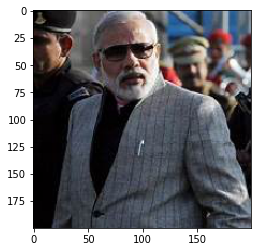

In [19]:
X=image.img_to_array(modi_test_image)
X=np.expand_dims(X,axis=0)
img=np.vstack([X])
val=model.predict(img)
plt.imshow(modi_test_image)
if val==0:
  print('THE IMAGE IS OF MODI')
else:
  print('THE IMAGE IS OF TRUMP')

THE IMAGE IS OF TRUMP


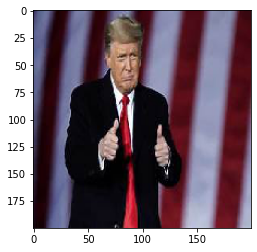

In [20]:
X=image.img_to_array(trump_test_image)
X=np.expand_dims(X,axis=0)
img=np.vstack([X])
val=model.predict(img)
plt.imshow(trump_test_image)
if val==0:
  print('THE IMAGE IS OF MODI')
else:
  print('THE IMAGE IS OF TRUMP')

THE IMAGE IS OF MODI


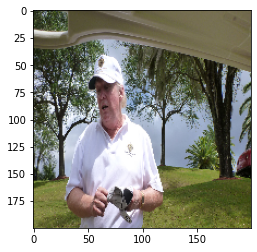

In [21]:
test_image=image.load_img('/content/drive/MyDrive/Almabetter projects/cnn/trump-weekend-golf-nj.jpg',target_size=(200,200))
X=image.img_to_array(test_image)
X=np.expand_dims(X,axis=0)
img=np.vstack([X])
val=model.predict(img)
plt.imshow(test_image)
if val==0:
  print('THE IMAGE IS OF MODI')
else:
  print('THE IMAGE IS OF TRUMP')

THE IMAGE IS OF MODI


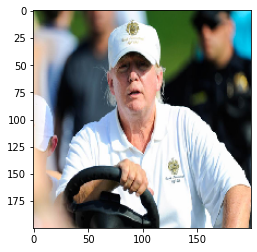

In [22]:
test_image=image.load_img('/content/drive/MyDrive/Almabetter projects/cnn/1588692097328.jpeg',target_size=(200,200))
X=image.img_to_array(test_image)
X=np.expand_dims(X,axis=0)
img=np.vstack([X])
val=model.predict(img)
plt.imshow(test_image)
if val==0:
  print('THE IMAGE IS OF MODI')
else:
  print('THE IMAGE IS OF TRUMP')